In [1]:
# Import des packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# import des datas SalairesData.csv
df = pd.read_csv('Data\SalairesData.csv', sep=';')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,Sexe,Salaire,Categorie,Age,Etablissement
0,H,140,CS,58,A
1,F,120,CS,55,A
2,H,118,CS,50,C
3,H,117,CS,44,C
4,H,117,CS,45,B


In [3]:
# informations sur les données
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sexe           130 non-null    object
 1   Salaire        130 non-null    int64 
 2   Categorie      130 non-null    object
 3   Age            130 non-null    int64 
 4   Etablissement  130 non-null    object
dtypes: int64(2), object(3)
memory usage: 3.6+ KB


In [4]:
# description des données
df.describe()

,Salaire,Age
count,130.000000,130.000000
mean,32.038462,33.200000
std,26.085252,11.999612
min,18.000000,18.000000
25%,21.000000,23.000000
50%,23.000000,30.500000
75%,26.000000,42.000000
max,140.000000,59.000000


In [5]:
df.columns

Index(['Sexe', 'Salaire', 'Categorie', 'Age', 'Etablissement'], dtype='object')

In [6]:
df_categorie = df[['Categorie', 'Salaire', 'Age']]
df_sexe = df[['Sexe', 'Salaire', 'Age']]
df_etablissement = df[['Etablissement', 'Salaire', 'Age']]
df_sexe.head()

,Sexe,Salaire,Age
0,H,140,58
1,F,120,55
2,H,118,50
3,H,117,44
4,H,117,45


Suite à l'étude de ces trois boites de Tukey, nous remarquons que les salaires semblent varier en fonction des catégories et du sexe principalement. L'établissement ne semble pas être un facteur fortement corrélé avec le salaire.

# Etude du salaire en fonction du Sexe

In [7]:
# création des sous populations
df_sexe_H = df_sexe[df_sexe['Sexe']== 'H']
df_sexe_F = df_sexe[df_sexe['Sexe']== 'F']
df_sexe_H.head()

,Sexe,Salaire,Age
0,H,140,58
2,H,118,50
3,H,117,44
4,H,117,45
5,H,115,42


In [8]:
# Indicateurs de position
mean = df_sexe.mean()
median = df_sexe.median()
quantiles = df_sexe.quantile([0.25, 0.5, 0.75])

# Indicateurs de dispersion
std_dev = df_sexe.std()
variance = df_sexe.var()
iqr = df_sexe.quantile(0.75) - df_sexe.quantile(0.25)

print("Indicateurs de position:")
print("Moyenne:\n", mean, "\n\nMédiane:\n", median, "\n\nQuantiles:\n", quantiles)

print("\nIndicateurs de dispersion:", "\nÉcart-type:\n", std_dev, "\n\nVariance:\n", variance, "\n\nÉcart interquartile (IQR):\n", iqr)

Indicateurs de position:
Moyenne:
 Salaire    32.038462
Age        33.200000
dtype: float64 

Médiane:
 Salaire    23.0
Age        30.5
dtype: float64 

Quantiles:
       Salaire   Age
0.25     21.0  23.0
0.50     23.0  30.5
0.75     26.0  42.0

Indicateurs de dispersion: 
Écart-type:
 Salaire    26.085252
Age        11.999612
dtype: float64 

Variance:
 Salaire    680.440370
Age        143.990698
dtype: float64 

Écart interquartile (IQR):
 Salaire     5.0
Age        19.0
dtype: float64


C:\Users\CYTECH~1\AppData\Local\Temp/ipykernel_8212/2390011565.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean = df_sexe.mean()
C:\Users\CYTECH~1\AppData\Local\Temp/ipykernel_8212/2390011565.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  median = df_sexe.median()
C:\Users\CYTECH~1\AppData\Local\Temp/ipykernel_8212/2390011565.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  std_dev = df_sexe.std()
C:\Users\CYTECH~1\AppData\Local\Temp/ipykernel_8212/2390011565.py:8: Futu

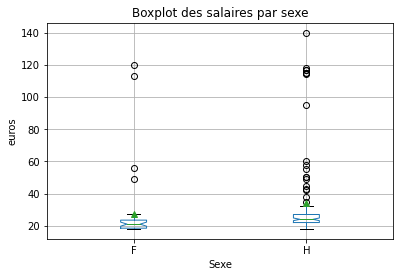

In [9]:
# boite de Tukey des Salaire par Sexe
df_sexe.boxplot(column='Salaire', by='Sexe', showmeans=True, notch = True)
plt.ylabel('euros')
plt.suptitle('')
plt.title('Boxplot des salaires par sexe')
plt.show()  

Text(0.5, 1.0, 'histogramme des salaires et ages par sexe')

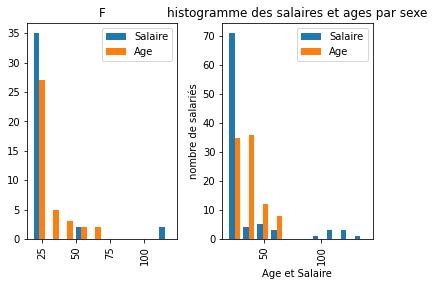

In [38]:
# histogramme pour la variables sexe pour le salaire et l'age
df_sexe.hist(column=['Salaire', 'Age'], by='Sexe', bins = 10, legend=True)
plt.ylabel('nombre de salariés')
plt.xlabel('Age et Salaire')
plt.title('histogramme des salaires et ages par sexe')

In [39]:
# calcule de la variation intern de la variable Sexe
eff_H = df_sexe_H['Salaire'].count()
eff_F = df_sexe_F['Salaire'].count()
var_H = df_sexe_H.var()
var_F = df_sexe_F.var()
print('variance :', var_H)
print('effectif', eff_F)
print('variance :', var_H)
print('effectif', eff_F)
var_intra = (eff_H*var_H +eff_F*var_F)/(eff_F+eff_H)
print('\n\n variation intra : ', var_intra, '\n\n')


variance : Salaire    751.420269
Age        126.340904
dtype: float64
effectif 39
variance : Salaire    751.420269
Age        126.340904
dtype: float64
effectif 39


 variation intra :  Salaire    675.433459
Age        132.945920
dtype: float64 




C:\Users\CYTECH~1\AppData\Local\Temp/ipykernel_8212/1708202318.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  var_H = df_sexe_H.var()
C:\Users\CYTECH~1\AppData\Local\Temp/ipykernel_8212/1708202318.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  var_F = df_sexe_F.var()


In [40]:
# Etude de la variation intern de la variable Sexe
moy_H = df_sexe_H['Salaire'].mean()
moy_F = df_sexe_F['Salaire'].mean()
moy_global = (1/(eff_H+eff_F))/(eff_H*moy_H +eff_F*moy_F)
print(moy_global)
variation_exter = (eff_H*(moy_H-moy_global)+eff_F*(moy_F-moy_global))/(eff_H+eff_F)
print('\n\n variation exterieur : ', variation_exter, '\n\n')

1.8468926031951242e-06


 variation exterieur :  32.03845969156894 




In [41]:
# Calcule de la variation globale
var_intra['Salaire']+variation_exter

707.4719189808177

# Etude du salaire en fonction de l'établissement

In [13]:
# création des sous populations
df_etablissement_A = df_etablissement[df_etablissement['Etablissement']== 'A']
df_etablissement_B = df_etablissement[df_etablissement['Etablissement']== 'B']
df_etablissement_C = df_etablissement[df_etablissement['Etablissement']== 'C']
df_etablissement_A.head()

,Etablissement,Salaire,Age
0,A,140,58
1,A,120,55
5,A,115,42
9,A,95,59
10,A,60,58


In [14]:
# Indicateurs de position
mean = df_etablissement.mean()
median = df_etablissement.median()
quantiles = df_etablissement.quantile([0.25, 0.5, 0.75])

# Indicateurs de dispersion
std_dev = df_etablissement.std()
variance = df_etablissement.var()
iqr = df_etablissement.quantile(0.75) - df_etablissement.quantile(0.25)

print("Indicateurs de position:")
print("Moyenne:\n", mean, "\n\nMédiane:\n", median, "\n\nQuantiles:\n", quantiles)

print("\nIndicateurs de dispersion:", "\nÉcart-type:\n", std_dev, "\n\nVariance:\n", variance, "\n\nÉcart interquartile (IQR):\n", iqr)

Indicateurs de position:
Moyenne:
 Salaire    32.038462
Age        33.200000
dtype: float64 

Médiane:
 Salaire    23.0
Age        30.5
dtype: float64 

Quantiles:
       Salaire   Age
0.25     21.0  23.0
0.50     23.0  30.5
0.75     26.0  42.0

Indicateurs de dispersion: 
Écart-type:
 Salaire    26.085252
Age        11.999612
dtype: float64 

Variance:
 Salaire    680.440370
Age        143.990698
dtype: float64 

Écart interquartile (IQR):
 Salaire     5.0
Age        19.0
dtype: float64


C:\Users\CYTECH~1\AppData\Local\Temp/ipykernel_8212/2778634770.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean = df_etablissement.mean()
C:\Users\CYTECH~1\AppData\Local\Temp/ipykernel_8212/2778634770.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  median = df_etablissement.median()
C:\Users\CYTECH~1\AppData\Local\Temp/ipykernel_8212/2778634770.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  std_dev = df_etablissement.std()
C:\Users\CYTECH~1\AppData\Local\Temp/ipykernel

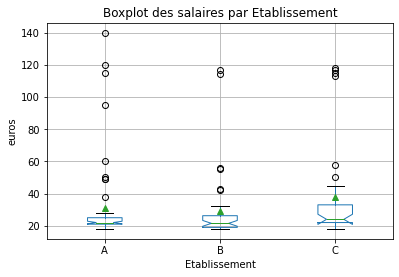

In [15]:
# boite de Tukey des Salaire par Etablissement
df_etablissement.boxplot(column='Salaire', by='Etablissement', showmeans=True, notch= True)
plt.ylabel('euros')
plt.title('Boxplot des salaires par Etablissement')
plt.suptitle('')
plt.show() 

Text(0.5, 1.0, 'histogramme des salaires et ages par Etablissement')

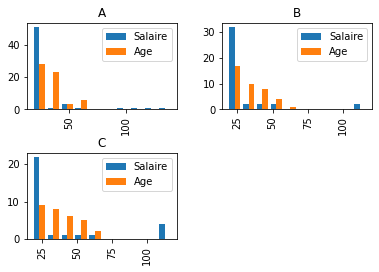

In [16]:
# histogramme pour la variables Etablissement pour le salaire et l'age
df_etablissement.hist(column=['Salaire', 'Age'], by='Etablissement', bins = 10, legend=True)
plt.ylabel('nombre de salariés')
plt.xlabel('Age et Salaire')
plt.title('histogramme des salaires et ages par Etablissement')

In [17]:
# calcule de la variation intern de la variable Etablissement
eff_A = df_etablissement_A['Salaire'].count()
eff_B = df_etablissement_B['Salaire'].count()
eff_C = df_etablissement_C['Salaire'].count()
var_A = df_etablissement_A.var()
var_B = df_etablissement_B.var()
var_C = df_etablissement_C.var()
print('variance :', var_A)
print('effectif', eff_A)
print('variance :', var_B)
print('effectif', eff_B)
print('variance :', var_C)
print('effectif', eff_C)
var_intra = (eff_A*var_A +eff_B*var_B+eff_C*var_C)/(eff_C+eff_B+eff_A)
print('\n\n variation intra : ', var_intra, '\n\n')


variance : Salaire    628.501695
Age        129.117514
dtype: float64
effectif 60
variance : Salaire    484.173718
Age        144.356410
dtype: float64
effectif 40
variance : Salaire    1045.222989
Age         173.236782
dtype: float64
effectif 30


 variation intra :  Salaire    680.259539
Age        143.987775
dtype: float64 




C:\Users\CYTECH~1\AppData\Local\Temp/ipykernel_8212/3543720702.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  var_A = df_etablissement_A.var()
C:\Users\CYTECH~1\AppData\Local\Temp/ipykernel_8212/3543720702.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  var_B = df_etablissement_B.var()
C:\Users\CYTECH~1\AppData\Local\Temp/ipykernel_8212/3543720702.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  var_C = df_etablissement_C.var()


In [18]:
# Etude de la variation extern de la variable Etablissement
moy_A = df_etablissement_A['Salaire'].mean()
moy_B = df_etablissement_B['Salaire'].mean()
moy_C = df_etablissement_C['Salaire'].mean()
moy_global = (1/(eff_C+eff_B+eff_A))/(eff_A*moy_A +eff_B*moy_B+eff_C*moy_C)
print(moy_global)
variation_exter = (eff_A*(moy_A-moy_global)+eff_B*(moy_B-moy_global)+eff_C*(moy_C-moy_global))/(eff_C+eff_B+eff_A)
print('\n\n variation exterieur : ', variation_exter, '\n\n')

1.8468926031951242e-06


 variation exterieur :  32.03845969156894 




In [19]:
# Calcule de la variation globale
var_intra['Salaire']+variation_exter

712.2979986764642

# Etude du salaire en fonction de la catégorie

In [20]:
# création des sous populations
df_categorie_CS = df_categorie[df_categorie['Categorie']== 'CS']
df_categorie_CM = df_categorie[df_categorie['Categorie']== 'CM']
df_categorie_OE = df_categorie[df_categorie['Categorie']== 'OE']
df_categorie_OE.head()

,Categorie,Salaire,Age
30,OE,26,55
31,OE,26,52
32,OE,26,37
33,OE,26,42
34,OE,26,29


In [21]:
# Indicateurs de position
mean = df_categorie.mean()
median = df_categorie.median()
quantiles = df_categorie.quantile([0.25, 0.5, 0.75])

# Indicateurs de dispersion
std_dev = df_categorie.std()
variance = df_categorie.var()
iqr = df_categorie.quantile(0.75) - df_categorie.quantile(0.25)

print("Indicateurs de position:")
print("Moyenne:\n", mean, "\n\nMédiane:\n", median, "\n\nQuantiles:\n", quantiles)

print("\nIndicateurs de dispersion:", "\nÉcart-type:\n", std_dev, "\n\nVariance:\n", variance, "\n\nÉcart interquartile (IQR):\n", iqr)

Indicateurs de position:
Moyenne:
 Salaire    32.038462
Age        33.200000
dtype: float64 

Médiane:
 Salaire    23.0
Age        30.5
dtype: float64 

Quantiles:
       Salaire   Age
0.25     21.0  23.0
0.50     23.0  30.5
0.75     26.0  42.0

Indicateurs de dispersion: 
Écart-type:
 Salaire    26.085252
Age        11.999612
dtype: float64 

Variance:
 Salaire    680.440370
Age        143.990698
dtype: float64 

Écart interquartile (IQR):
 Salaire     5.0
Age        19.0
dtype: float64


C:\Users\CYTECH~1\AppData\Local\Temp/ipykernel_8212/3873683238.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean = df_categorie.mean()
C:\Users\CYTECH~1\AppData\Local\Temp/ipykernel_8212/3873683238.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  median = df_categorie.median()
C:\Users\CYTECH~1\AppData\Local\Temp/ipykernel_8212/3873683238.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  std_dev = df_categorie.std()
C:\Users\CYTECH~1\AppData\Local\Temp/ipykernel_8212/387368

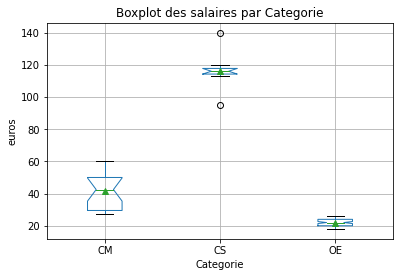

In [22]:
# boite de Tukey des Salaire par Categorie
df_categorie.boxplot(column='Salaire', by='Categorie', showmeans=True, notch = True)
plt.ylabel('euros')
plt.suptitle('')
plt.title('Boxplot des salaires par Categorie')
plt.show()  

Text(0.5, 1.0, 'histogramme des salaires et ages par Categorie')

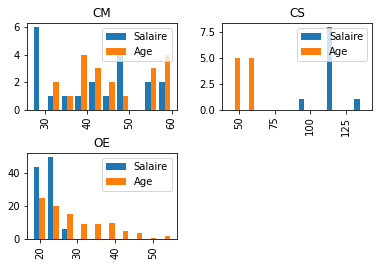

In [23]:
# histogramme pour la variables categorie pour le salaire et l'age
df_categorie.hist(column=['Salaire', 'Age'], by='Categorie', bins = 10, legend=True)
plt.ylabel('nombre de salariés')
plt.xlabel('Age et Salaire')
plt.title('histogramme des salaires et ages par Categorie')

In [24]:
# calcule de la variation intern de la variable Categorie
eff_A = df_categorie_CS['Salaire'].count()
eff_B = df_categorie_CM['Salaire'].count()
eff_C = df_categorie_OE['Salaire'].count()
var_A = df_categorie_CS.var()
var_B = df_categorie_CM.var()
var_C = df_categorie_OE.var()
print('variance :', var_A)
print('effectif', eff_A)
print('variance :', var_B)
print('effectif', eff_B)
print('variance :', var_C)
print('effectif', eff_C)
var_intra = (eff_A*var_A +eff_B*var_B+eff_C*var_C)/(eff_C+eff_B+eff_A)
print('\n\n variation intra : ', var_intra, '\n\n')


variance : Salaire    116.933333
Age         44.100000
dtype: float64
effectif 10
variance : Salaire    135.726316
Age         86.484211
dtype: float64
effectif 20
variance : Salaire     6.037475
Age        79.218081
dtype: float64
effectif 100


 variation intra :  Salaire    34.520055
Age        77.634556
dtype: float64 




C:\Users\CYTECH~1\AppData\Local\Temp/ipykernel_8212/4293761992.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  var_A = df_categorie_CS.var()
C:\Users\CYTECH~1\AppData\Local\Temp/ipykernel_8212/4293761992.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  var_B = df_categorie_CM.var()
C:\Users\CYTECH~1\AppData\Local\Temp/ipykernel_8212/4293761992.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  var_C = df_categorie_OE.var()


In [25]:
# Etude de la variation extern de la variable Categorie
moy_A = df_categorie_CS['Salaire'].mean()
moy_B = df_categorie_CM['Salaire'].mean()
moy_C = df_categorie_OE['Salaire'].mean()
moy_global = (1/(eff_C+eff_B+eff_A))/(eff_A*moy_A +eff_B*moy_B+eff_C*moy_C)
print(moy_global)
variation_exter = (eff_A*(moy_A-moy_global)+eff_B*(moy_B-moy_global)+eff_C*(moy_C-moy_global))/(eff_C+eff_B+eff_A)
print('\n\n variation exterieur : ', variation_exter, '\n\n')

1.8468926031951242e-06


 variation exterieur :  32.03845969156894 




In [26]:
# Calcule de la variation globale
var_intra['Salaire']+variation_exter

66.55851449057111

On change la variable 'Age' de quantitatif à qualitatif : 

In [27]:
# changement qualitatif en quantitatif de la variable Age
intervals = [0, 35, 55, 100]
colonnes = ['Jeune', 'Moyen', 'Vieux']
df['Age_Catégorie'] = pd.cut(df['Age'], bins=intervals, labels=colonnes, right=False)
df_age = df[['Age_Catégorie', 'Salaire']]
df_age.head()

,Age_Catégorie,Salaire
0,Vieux,140
1,Vieux,120
2,Moyen,118
3,Moyen,117
4,Moyen,117


In [28]:
# création des sous populations
df_age_J = df_age[df_age['Age_Catégorie']== 'Jeune']
df_age_M = df_age[df_age['Age_Catégorie']== 'Moyen']
df_age_V = df_age[df_age['Age_Catégorie']== 'Vieux']
df_age_V.head()

,Age_Catégorie,Salaire
0,Vieux,140
1,Vieux,120
7,Vieux,114
8,Vieux,113
9,Vieux,95


# Etude du salaire de la variable Age

In [29]:
# Indicateurs de position
mean = df_age.mean()
median = df_age.median()
quantiles = df_age.quantile([0.25, 0.5, 0.75])

# Indicateurs de dispersion
std_dev = df_age.std()
variance = df_age.var()
iqr = df_age.quantile(0.75) - df_age.quantile(0.25)

print("Indicateurs de position:")
print("Moyenne:\n", mean, "\n\nMédiane:\n", median, "\n\nQuantiles:\n", quantiles)

print("\nIndicateurs de dispersion:", "\nÉcart-type:\n", std_dev, "\n\nVariance:\n", variance, "\n\nÉcart interquartile (IQR):\n", iqr)

Indicateurs de position:
Moyenne:
 Salaire    32.038462
dtype: float64 

Médiane:
 Salaire    23.0
dtype: float64 

Quantiles:
       Salaire
0.25     21.0
0.50     23.0
0.75     26.0

Indicateurs de dispersion: 
Écart-type:
 Salaire    26.085252
dtype: float64 

Variance:
 Salaire    680.44037
dtype: float64 

Écart interquartile (IQR):
 Salaire    5.0
dtype: float64


C:\Users\CYTECH~1\AppData\Local\Temp/ipykernel_8212/3390936153.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean = df_age.mean()
C:\Users\CYTECH~1\AppData\Local\Temp/ipykernel_8212/3390936153.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  median = df_age.median()
C:\Users\CYTECH~1\AppData\Local\Temp/ipykernel_8212/3390936153.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  std_dev = df_age.std()
C:\Users\CYTECH~1\AppData\Local\Temp/ipykernel_8212/3390936153.py:8: FutureW

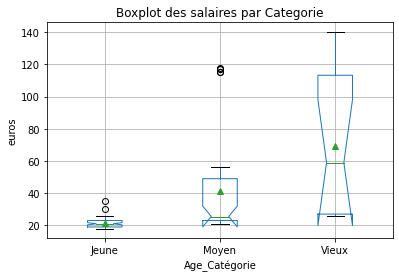

In [30]:
# boite de Tukey des Salaire par Categorie
df_age.boxplot(column='Salaire', by='Age_Catégorie', showmeans=True, notch = True)
plt.ylabel('euros')
plt.suptitle('')
plt.title('Boxplot des salaires par Categorie')
plt.show()  

Text(0.5, 1.0, 'histogramme des salaires par Age_Categorie')

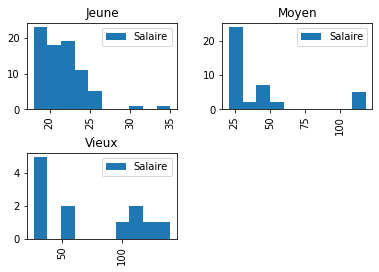

In [31]:
# histogramme pour la variables categorie pour le salaire et l'age
df_age.hist(column=['Salaire'], by='Age_Catégorie', bins = 10, legend=True)
plt.ylabel('nombre de salariés')
plt.xlabel('Salaire')
plt.suptitle('')
plt.title('histogramme des salaires par Age_Categorie')

In [32]:
# calcule de la variation intern de la variable Age
eff_A = df_age_J['Salaire'].count()
eff_B = df_age_M['Salaire'].count()
eff_C = df_age_V['Salaire'].count()
var_A = df_age_J.var()
var_B = df_age_M.var()
var_C = df_age_V.var()
print('variance :', var_A)
print('effectif', eff_A)
print('variance :', var_B)
print('effectif', eff_B)
print('variance :', var_C)
print('effectif', eff_C)
var_intra = (eff_A*var_A +eff_B*var_B+eff_C*var_C)/(eff_C+eff_B+eff_A)
print('\n\n variation intra : ', var_intra, '\n\n')


variance : Salaire    8.868465
dtype: float64
effectif 78
variance : Salaire    935.589744
dtype: float64
effectif 40
variance : Salaire    1936.265152
dtype: float64
effectif 12


 variation intra :  Salaire    471.927014
dtype: float64 




C:\Users\CYTECH~1\AppData\Local\Temp/ipykernel_8212/872289080.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  var_A = df_age_J.var()
C:\Users\CYTECH~1\AppData\Local\Temp/ipykernel_8212/872289080.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  var_B = df_age_M.var()
C:\Users\CYTECH~1\AppData\Local\Temp/ipykernel_8212/872289080.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  var_C = df_age_V.var()


In [33]:
# Etude de la variation extern de la variable Age
moy_A = df_age_J['Salaire'].mean()
moy_B = df_age_M['Salaire'].mean()
moy_C = df_age_V['Salaire'].mean()
moy_global = (1/(eff_C+eff_B+eff_A))/(eff_A*moy_A +eff_B*moy_B+eff_C*moy_C)
print(moy_global)
variation_exter = (eff_A*(moy_A-moy_global)+eff_B*(moy_B-moy_global)+eff_C*(moy_C-moy_global))/(eff_C+eff_B+eff_A)
print('\n\n variation exterieur : ', variation_exter, '\n\n')

1.8468926031951242e-06


 variation exterieur :  32.03845969156894 




In [34]:
# Calcule de la variation globale
var_intra['Salaire']+variation_exter

503.9654737031984